# 2 inputs, 3 Neurons, 3 output
# Sequential + Linear network definition

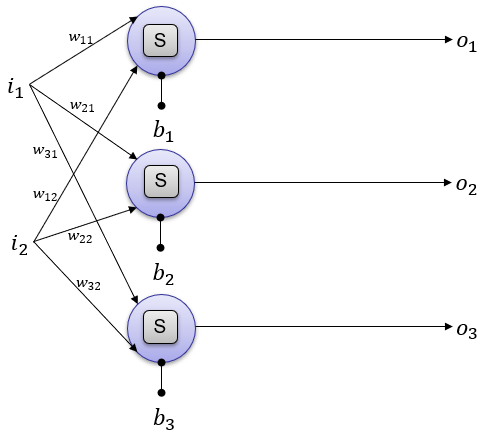

In [1]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_o3_sigmoid_01a.png", width=500)

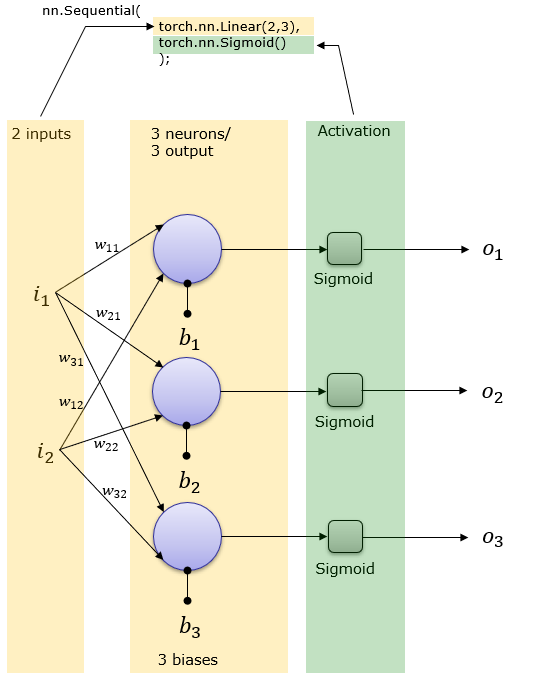

In [2]:
from IPython.display import Image
Image(filename = "nn_img/Python_Pytorch_nn_Sequential_i2_o3_sigmoid_01.png", width=500)

# Prerequisites

In [3]:
import torch
from torch import nn
from torch import optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#predictive
torch.manual_seed(1);

device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')  
    
#sigmoid explicit
def sigmoid(x):
    return 1/(1+torch.exp(-x))

#sigmoid pre-defined
activation = torch.nn.Sigmoid()

# Loss (Binary Cross Entropy) error function, explicit def
def bce_err(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)

#sigmoid + BCELoss (Binary Cross Entropy)
criterion = torch.nn.BCEWithLogitsLoss()

def state(interval,i,loss,out,y):
    if(i%interval == 0):
        print("\n========== Epoch", i,"==========")
        print("loss=",loss)
    
        #to numpy
        out1 = out.data.numpy()
        y3 = y.numpy()
        #all values less than 0.5 to < 0
        out2 = out1-0.5
        # <0.5 turned to False, >= 0.5 turned to True
        out3 = (out2>=0)
        #boolean to decimal 0/1
        out4=out3*1   
        #boolean results
        rez = (out4 == y3)        
        #procent of True's(exact classification: y_hat=y, prediction = label/target)
        accuracy = np.min(np.mean(rez,axis=0))
        print("accuracy=",accuracy)        
        
#training points
data = np.array([
    [0.1,0.1,0,0,0],
    [0.2,0.5,1,0,0],
    [-0.5,-0.3,0,1,0],
    [0.9,0.1,0,0,1],
    [0.5,-0.4,1,1,0],
    [0.3,0.3,0,1,1],
    [-0.8,0.2,1,0,1],
    [0.7,0.4,1,1,1],    
])          

#df = pd.read_csv('test.csv', header=None)
#df = pd.read_csv('data2.csv', header=None)
#data = df.to_numpy()        

### Sequential + Linear network definition

In [4]:
#        nn.Linear(input,neurons)    
linear = nn.Linear(2, 3)
linear.weight

Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]], requires_grad=True)

In [5]:
torch.manual_seed(1);
#features
x = torch.from_numpy(data[:, [0,1]]).float()
#target/labels
y = torch.from_numpy(data[:, [2]]).float()

net = nn.Sequential(nn.Linear(2, 3),
                    nn.Sigmoid(),
                   )

print(net)
print(net[0].weight.data)
print(net[0].bias.data)
print(net(x))

Sequential(
  (0): Linear(in_features=2, out_features=3, bias=True)
  (1): Sigmoid()
)
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]])
tensor([-0.1455,  0.3597,  0.0983])
tensor([[0.4650, 0.5937, 0.5185],
        [0.4431, 0.6221, 0.5442],
        [0.4418, 0.5814, 0.5754],
        [0.5377, 0.5670, 0.3874],
        [0.5403, 0.5395, 0.4003],
        [0.4676, 0.6030, 0.5065],
        [0.3777, 0.6308, 0.6717],
        [0.4962, 0.5979, 0.4506]], grad_fn=<SigmoidBackward>)


In [6]:
#learn rate
alpha = 0.1
#iterations
epochs = 5000
#display state
fv = 500

#Stochastic/Batch gradient descent
optimizer = optim.SGD(net.parameters(), lr=alpha)

lossHistory = []
predictionHistory = []

w = net[0].weight.data.numpy()
b = net[0].bias.data.numpy()[0]

for i in range(epochs):
    #forward
    out = net(x)
    
    #error function
    loss = torch.mean(bce_err(out,y))
    #loss = torch.mean(nn.BCELoss(out,y))
    #loss = criterion(out, y)
    
    lossHistory.append(loss)
    
    optimizer.zero_grad()
    
    #process gradients
    loss.backward()
    
    #update weights
    optimizer.step()

    w = net[0].weight.data.numpy()
    b = net[0].bias.data.numpy()[0]
    
    state(fv,i,loss,out,y)
        
print("")
w = net[0].weight.data
b = net[0].bias.data
print("Final result:\n", w, b)


========== Epoch 0 ==========
loss= tensor(0.7007, grad_fn=<MeanBackward0>)
accuracy= 0.375

========== Epoch 500 ==========
loss= tensor(0.6789, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 1000 ==========
loss= tensor(0.6730, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 1500 ==========
loss= tensor(0.6703, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 2000 ==========
loss= tensor(0.6689, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 2500 ==========
loss= tensor(0.6682, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 3000 ==========
loss= tensor(0.6678, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 3500 ==========
loss= tensor(0.6676, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 4000 ==========
loss= tensor(0.6675, grad_fn=<MeanBackward0>)
accuracy= 0.625

========== Epoch 4500 ==========
loss= tensor(0.6674, grad_fn=<MeanBackward0>)
accuracy= 0.625

Final result:
 tensor([[-0.3056,  1.4830],


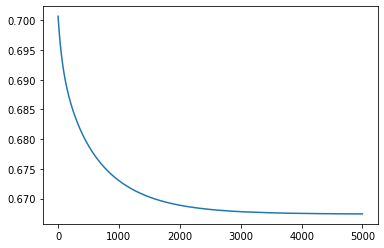

In [7]:
#loss evolution
graph_x = np.arange(0, epochs)
graph_y = lossHistory
plt.plot(graph_x, graph_y)
plt.show()

### Setting custom weights

In [8]:
w = torch.tensor( [[1, -1, 1],
                   [1, -1, 1]], dtype=torch.float64, requires_grad=True)
b = torch.tensor( [[1, -1, 1]], dtype=torch.float64, requires_grad=True)
net.load_state_dict( {'0.weight': w.T, '0.bias': b[0]} )
#or
#net[0].load_state_dict( {'weight': w.T, 'bias': b[0]})
print(net.state_dict())
print(x)
print(net[0].weight)
print(net[0].bias)
out = net(x)
print("---\n",out,"\n---")

OrderedDict([('0.weight', tensor([[ 1.,  1.],
        [-1., -1.],
        [ 1.,  1.]])), ('0.bias', tensor([ 1., -1.,  1.]))])
tensor([[ 0.1000,  0.1000],
        [ 0.2000,  0.5000],
        [-0.5000, -0.3000],
        [ 0.9000,  0.1000],
        [ 0.5000, -0.4000],
        [ 0.3000,  0.3000],
        [-0.8000,  0.2000],
        [ 0.7000,  0.4000]])
Parameter containing:
tensor([[ 1.,  1.],
        [-1., -1.],
        [ 1.,  1.]], requires_grad=True)
Parameter containing:
tensor([ 1., -1.,  1.], requires_grad=True)
---
 tensor([[0.7685, 0.2315, 0.7685],
        [0.8455, 0.1545, 0.8455],
        [0.5498, 0.4502, 0.5498],
        [0.8808, 0.1192, 0.8808],
        [0.7503, 0.2497, 0.7503],
        [0.8320, 0.1680, 0.8320],
        [0.5987, 0.4013, 0.5987],
        [0.8909, 0.1091, 0.8909]], grad_fn=<SigmoidBackward>) 
---


In [9]:
net[0].weight.data.fill_(1)
net[0].bias.data.fill_(1)
print(net.state_dict())
print(x)
print(net[0].weight)
print(net[0].bias)
out = net(x)
print("---\n",out,"\n---")

OrderedDict([('0.weight', tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])), ('0.bias', tensor([1., 1., 1.]))])
tensor([[ 0.1000,  0.1000],
        [ 0.2000,  0.5000],
        [-0.5000, -0.3000],
        [ 0.9000,  0.1000],
        [ 0.5000, -0.4000],
        [ 0.3000,  0.3000],
        [-0.8000,  0.2000],
        [ 0.7000,  0.4000]])
Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)
Parameter containing:
tensor([1., 1., 1.], requires_grad=True)
---
 tensor([[0.7685, 0.7685, 0.7685],
        [0.8455, 0.8455, 0.8455],
        [0.5498, 0.5498, 0.5498],
        [0.8808, 0.8808, 0.8808],
        [0.7503, 0.7503, 0.7503],
        [0.8320, 0.8320, 0.8320],
        [0.5987, 0.5987, 0.5987],
        [0.8909, 0.8909, 0.8909]], grad_fn=<SigmoidBackward>) 
---
